**TITANIC SURVIVAL PREDICTION MODEL :**

**IMPORT LIBRARY**

In [16]:
import pandas as pd

**IMPORT DATA**

In [17]:
titanic=pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Titanic.csv')
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**DATA PREPROCESSING**

In [34]:
titanic['sex']=titanic['sex'].replace(['female','male'],[0,1])
titanic['embarked']=titanic['embarked'].replace(['C','Q','S'],[0,1,2])
titanic['boat']=titanic['boat'].fillna(0)
titanic['body']=titanic['body'].fillna(0)
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",0,29.00,0,0,24160,211.3375,B5,2.0,2,0.0,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",1,0.92,1,2,113781,151.5500,C22 C26,2.0,11,0.0,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",0,2.00,1,2,113781,151.5500,C22 C26,2.0,0,0.0,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",1,30.00,1,2,113781,151.5500,C22 C26,2.0,0,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0,25.00,1,2,113781,151.5500,C22 C26,2.0,0,0.0,"Montreal, PQ / Chesterville, ON"


<Axes: xlabel='survived', ylabel='count'>

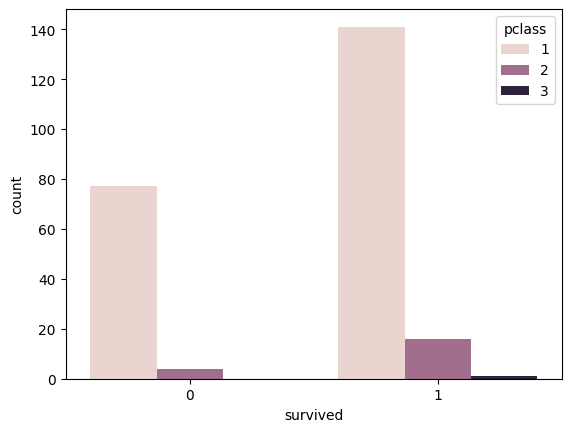

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='survived',data=titanic,hue='pclass')

In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 239 entries, 0 to 605
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     239 non-null    int64  
 1   survived   239 non-null    int64  
 2   name       239 non-null    object 
 3   sex        239 non-null    int64  
 4   age        239 non-null    float64
 5   sibsp      239 non-null    int64  
 6   parch      239 non-null    int64  
 7   ticket     239 non-null    object 
 8   fare       239 non-null    float64
 9   cabin      239 non-null    object 
 10  embarked   239 non-null    float64
 11  boat       239 non-null    object 
 12  body       239 non-null    float64
 13  home.dest  239 non-null    object 
dtypes: float64(4), int64(5), object(5)
memory usage: 28.0+ KB


In [37]:
titanic.dropna(inplace=True)
titanic.isna().sum()

,0
pclass,0
survived,0
name,0
sex,0
age,0
sibsp,0
parch,0
ticket,0
fare,0
cabin,0


In [38]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [39]:
y=titanic['survived']
x=titanic[['pclass','sex','age','sibsp','parch','fare','embarked','body']]

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 2529)

In [41]:
from sklearn.linear_model import LogisticRegression

In [42]:
model=LogisticRegression(max_iter=500)

In [43]:

model.fit(x_train,y_train)

LogisticRegression(max_iter=500)

In [44]:
model.predict(x_test)

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0])

In [45]:
y_pred=model.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8333333333333334

In [46]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
cross_val_score(LogisticRegression(),x,y,cv=cv)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

array([0.70833333, 0.75      , 0.79166667, 0.8125    , 0.72916667])

**Model accuracy - 83.33%**